<a href="https://colab.research.google.com/github/ankitkarmakar95/Mega-Store-Data-Analysis-Review/blob/main/Review_Model_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annual sales data of a popular supermarket is to be analysed here

Objective of the analysis:

1. Getting Insights to make data-driven business decisions. 
2. Usage of Machine learning to build predictive models.
3. Usage of Evaluation metrics to evaluate the performance of the model


The store is known as 'MegaHut'

## Libraries imported

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Data and basic description

In [ ]:
mega=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MegaStore.csv')

In [ ]:
mega.head(6)

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales
0,FDU28,Frozen Foods,19.20,Regular,0.094450,187.8214,OUT_017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
1,FDY07,Fruits and Vegetables,11.80,Low Fat,0.000000,45.5402,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
2,FDA03,Dairy,18.50,Regular,0.045464,144.1102,OUT_046,1997,Small,Tier 1,Supermarket Type1,2187.1530
3,FDX32,Fruits and Vegetables,15.10,Regular,0.100014,145.4786,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
4,FDS46,Snack Foods,17.60,Regular,0.047257,119.6782,OUT_046,1997,Small,Tier 1,Supermarket Type1,2145.2076
5,FDF32,Fruits and Vegetables,16.35,Low Fat,0.068024,196.4426,OUT_013,1987,High,Tier 3,Supermarket Type1,1977.4260


In [ ]:
mega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item                     8523 non-null   object 
 1   Itemtype                 8523 non-null   object 
 2   Weight                   7060 non-null   float64
 3   FatContent               8523 non-null   object 
 4   Visibility               8523 non-null   float64
 5   MRP                      8523 non-null   float64
 6   Outlet                   8523 non-null   object 
 7   OutletEstablishmentYear  8523 non-null   int64  
 8   OutletSize               6113 non-null   object 
 9   OutletCity               8523 non-null   object 
 10  OutletType               8523 non-null   object 
 11  Sales                    8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
mega.shape

(8523, 12)

In [ ]:

mega.describe()

,Weight,Visibility,MRP,OutletEstablishmentYear,Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data cleansing & EDA

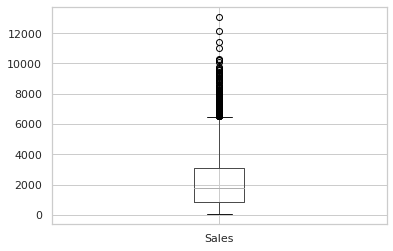

In [ ]:
mega[['Sales']].boxplot()

In [ ]:
mega[mega['Sales']>10500]

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales
1450,FDZ20,Fruits and Vegetables,NaN,Low Fat,0.000000,253.0356,OUT_027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,Snack Foods,NaN,Low Fat,0.088840,254.2672,OUT_027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
5223,FDQ19,Fruits and Vegetables,NaN,Regular,0.014296,242.6512,OUT_027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
7188,NCE42,Household,NaN,Low Fat,0.010551,234.9958,OUT_027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


We have four clearly visible outliers, but for the timebeing, we will keep the data as it is, We can not omit these rows because these are all potent data for our model.

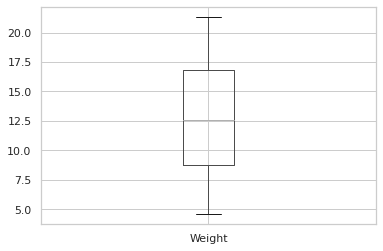

In [ ]:
mega[['Weight']].boxplot()

Weight feild has no outliers

In [ ]:
mega.isnull().sum()

Item                          0
Itemtype                      0
Weight                     1463
FatContent                    0
Visibility                    0
MRP                           0
Outlet                        0
OutletEstablishmentYear       0
OutletSize                 2410
OutletCity                    0
OutletType                    0
Sales                         0
dtype: int64

We can see weight and Outletsize have null values, As null values affect the ML model, hence let us fill up them with default values.

For Weight, we will use median value
And for Outlet size, we have to use the mode.

In [ ]:
mega.loc[mega.Weight.isnull(),'Weight']= mega.Weight.median()

In [ ]:
mega.loc[mega.Weight.isnull()]

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales


Will do the same with outletsize

In [ ]:
a=mega['OutletSize'].mode()

In [ ]:
mega.loc[mega['OutletSize'].isnull(),'OutletSize']= a[0]

In [ ]:
mega.isnull().sum()

Item                       0
Itemtype                   0
Weight                     0
FatContent                 0
Visibility                 0
MRP                        0
Outlet                     0
OutletEstablishmentYear    0
OutletSize                 0
OutletCity                 0
OutletType                 0
Sales                      0
dtype: int64

In [ ]:
mega[mega.duplicated()]

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales


So, we don't have any duplicate value in our data set

In [ ]:
mega['FatContent'].value_counts()

Low Fat    5089
Regular    2889
Low         316
reg         117
low fat     112
Name: FatContent, dtype: int64

We have different type of inputs in fatcontent column which ultimately means the same. This may cause poor efficiency of our ML model. So we need to replace 

Low as Low Fat

reg as Regular

low fat as Low Fat

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


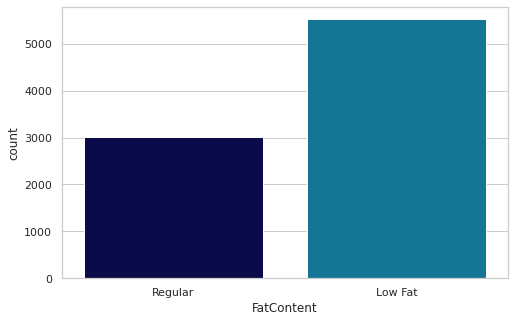

In [ ]:
mega['FatContent'].replace(['low fat','LF','reg', 'Low'],['Low Fat','Low Fat','Regular','Low Fat'],inplace = True)
mega['FatContent']= mega['FatContent'].astype(str)
plt.figure(figsize=(8,5))
sns.countplot('FatContent',data=mega,palette='ocean')

Will create another column for Item type based on the item name.

If we observe the item name, the first two letter describe its type.

FD - Food

NC - Non-consumable

DR - Drinks



In [ ]:
mega['Item_Type_Combined'] = mega['Item'].apply(lambda x: x[0:2])
mega['Item_Type_Combined'] = mega['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [ ]:
mega['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

As some of the products are non-consumable, For them we need to mark the fat content as 'Non-Edible' as a non consumable product having low fat makes no sense

In [ ]:
mega.loc[mega['Item_Type_Combined']=="Non-Consumable",'FatContent'] = "Non-Edible"
mega['FatContent'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: FatContent, dtype: int64

Age of a store sounds more significant than establishment year. hence creating a new column for the same. 

In [ ]:
#Create another column to determine the store age
vnn= lambda a : (2022-a)
mega['age_of_store']= mega['OutletEstablishmentYear'].apply(vnn)

In [ ]:
mega.head(4)

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales,Item_Type_Combined,age_of_store
0,FDU28,Frozen Foods,19.2,Regular,0.094450,187.8214,OUT_017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,Food,15
1,FDY07,Fruits and Vegetables,11.8,Low Fat,0.000000,45.5402,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,Food,23
2,FDA03,Dairy,18.5,Regular,0.045464,144.1102,OUT_046,1997,Small,Tier 1,Supermarket Type1,2187.1530,Food,25
3,FDX32,Fruits and Vegetables,15.1,Regular,0.100014,145.4786,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1589.2646,Food,23


In [ ]:
mega.describe()

,Weight,Visibility,MRP,OutletEstablishmentYear,Sales,age_of_store
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914,24.168133
std,4.22724,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.55500,0.000000,31.290000,1985.000000,33.290000,13.000000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400,18.000000
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000,23.000000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400,35.000000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800,37.000000


## Insights from the Data

Let's check, which type of item people buy from these stores


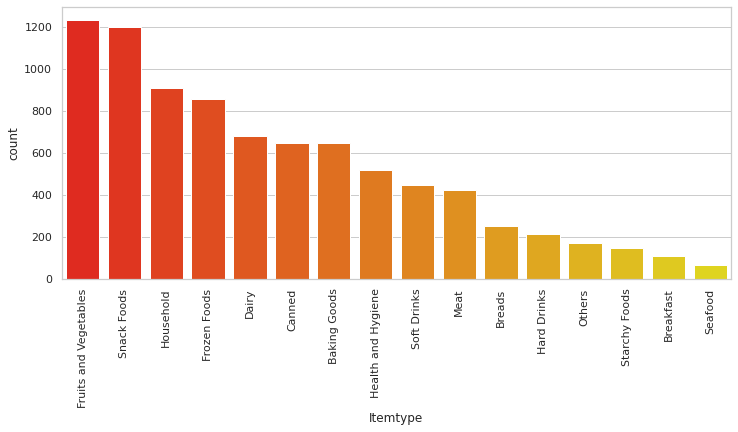

In [ ]:
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.countplot(x="Itemtype", data=mega, order=mega['Itemtype'].value_counts().sort_values(ascending=False).index, palette='autumn')
plt.xticks(rotation=90)
plt.show()

As we can see, Stores are more likely to sell Fruits and vegitables, but seafood popularity is very less.

Now, for a better picture we get the view of sales data for individual item types.

As a conclusion, we can see in the below plot that, though very few stores keep seefoods but the stores which keeps them are actually having a good amount of sales.

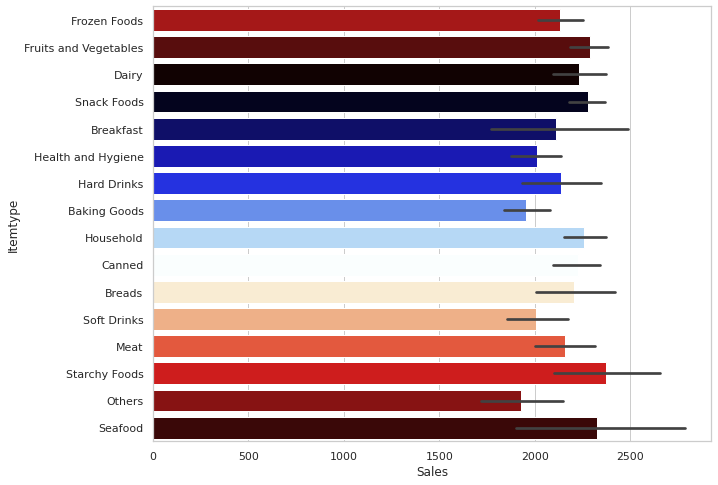

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='Itemtype',x='Sales',data=mega,palette='flag')

Now, let's get the top outlets on the basis of their sales count

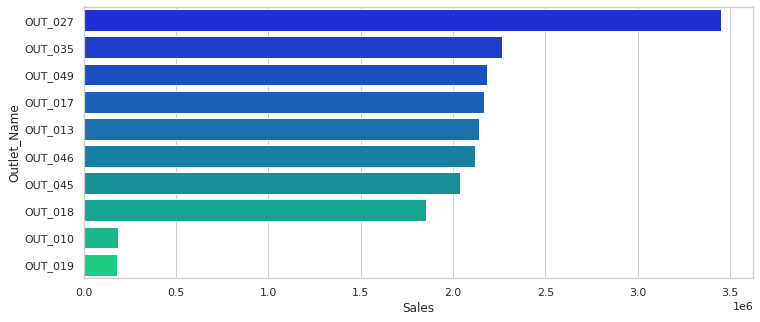

In [ ]:
Outlets_sell = mega.groupby("Outlet")[["Sales"]].sum().sort_values(by='Sales', ascending = False)
Outlets_sell['Outlet_Name'] = Outlets_sell.index
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.barplot(x='Sales',y='Outlet_Name', data=Outlets_sell, palette='winter')
plt.show()

Now we will compare the age of the top performing outlets

In [ ]:
Outlet_age = mega[['Outlet','age_of_store']].drop_duplicates()
Outlet_age['Outlet_Name']=Outlet_age['Outlet']
Outlet_age.drop(columns='Outlet', inplace=True)
Outlet_age               

,age_of_store,Outlet_Name
0,15,OUT_017
1,23,OUT_049
2,25,OUT_046
5,35,OUT_013
7,13,OUT_018
9,37,OUT_027
10,18,OUT_035
14,37,OUT_019
19,24,OUT_010
24,20,OUT_045


Let us check the sales vs age for the outlets.

In [ ]:
age_vs_sales = pd.merge(Outlets_sell,Outlet_age, how='left', on='Outlet_Name')
age_vs_sales

,Sales,Outlet_Name,age_of_store
0,3.453926e+06,OUT_027,37
1,2.268123e+06,OUT_035,18
2,2.183970e+06,OUT_049,23
3,2.167465e+06,OUT_017,15
4,2.142664e+06,OUT_013,35
5,2.118395e+06,OUT_046,25
6,2.036725e+06,OUT_045,20
7,1.851823e+06,OUT_018,13
8,1.883402e+05,OUT_010,24
9,1.796941e+05,OUT_019,37


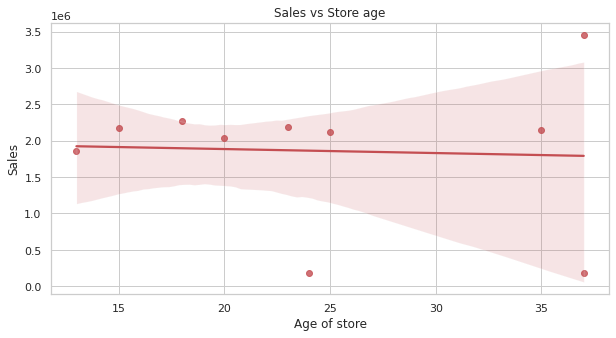

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x='age_of_store',y='Sales', data=age_vs_sales, color="r")
plt.xlabel('Age of store')
plt.ylabel('Sales')
plt.title('Sales vs Store age')
plt.show()

As we can see in the graph, Age of the store does not matter while we consider total sales.

But in some cases, for some type of products, customer may face trust issues in new stores practically, also many other dependencies may arrive which can alter the sales. So to build a machine learning model it is best to take multiple linear regression method.

Our ultimate goal is to predict the sales.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


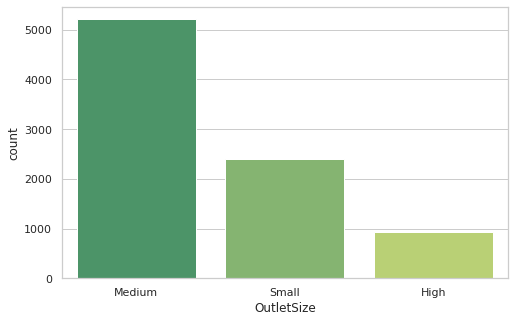

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('OutletSize',data=mega,palette='summer')

From the above plot we can tell that most of the business for the megastore comapny is coming from medium sized outlets.

##**Model Building** 

In [ ]:
m=mega.select_dtypes(exclude='object')
vif = pd.Series([variance_inflation_factor(m.values,idx) for idx in range(m.shape[1])], index=m.columns)
print(vif)

Weight                      1.000919
Visibility                  1.032550
MRP                         1.490962
OutletEstablishmentYear    24.163235
Sales                       1.520539
age_of_store                9.227097
dtype: float64


In [ ]:
m.drop(columns=['OutletEstablishmentYear','age_of_store'],inplace=True)
vif = pd.Series([variance_inflation_factor(m.values,idx) for idx in range(m.shape[1])], index=m.columns)
print(vif)

Weight        4.746564
Visibility    2.417203
MRP           7.595374
Sales         3.970986
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


From the above approach we can understand that, 'OutletEstablishmentYear','age_of_store' & 'MRP' have high value of multicolinearity. I personally think that MRP predictor is important in actual scenario. So, rest two will remove.

In [ ]:
main = mega.drop(columns=['OutletEstablishmentYear','age_of_store'])

In [ ]:
main.head()

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletSize,OutletCity,OutletType,Sales,Item_Type_Combined
0,FDU28,Frozen Foods,19.2,Regular,0.094450,187.8214,OUT_017,Medium,Tier 2,Supermarket Type1,4710.5350,Food
1,FDY07,Fruits and Vegetables,11.8,Low Fat,0.000000,45.5402,OUT_049,Medium,Tier 1,Supermarket Type1,1516.0266,Food
2,FDA03,Dairy,18.5,Regular,0.045464,144.1102,OUT_046,Small,Tier 1,Supermarket Type1,2187.1530,Food
3,FDX32,Fruits and Vegetables,15.1,Regular,0.100014,145.4786,OUT_049,Medium,Tier 1,Supermarket Type1,1589.2646,Food
4,FDS46,Snack Foods,17.6,Regular,0.047257,119.6782,OUT_046,Small,Tier 1,Supermarket Type1,2145.2076,Food


In [ ]:
#Lebel encoding
#le = LabelEncoder()
#var_mod = ['FatContent','OutletCity','OutletSize','Item_Type_Combined','OutletType','Outlet']
#for i in var_mod:
#    main[i] = le.fit_transform(main[i])

In [ ]:
#main.head()

In [ ]:
main.drop(columns=['Item',	'Itemtype'],inplace=True)
main.head()

,Weight,FatContent,Visibility,MRP,Outlet,OutletSize,OutletCity,OutletType,Sales,Item_Type_Combined
0,19.2,Regular,0.094450,187.8214,OUT_017,Medium,Tier 2,Supermarket Type1,4710.5350,Food
1,11.8,Low Fat,0.000000,45.5402,OUT_049,Medium,Tier 1,Supermarket Type1,1516.0266,Food
2,18.5,Regular,0.045464,144.1102,OUT_046,Small,Tier 1,Supermarket Type1,2187.1530,Food
3,15.1,Regular,0.100014,145.4786,OUT_049,Medium,Tier 1,Supermarket Type1,1589.2646,Food
4,17.6,Regular,0.047257,119.6782,OUT_046,Small,Tier 1,Supermarket Type1,2145.2076,Food


In [ ]:
#One Hot Coding:
main = pd.get_dummies(main, columns=['FatContent','OutletCity','OutletSize','OutletType','Item_Type_Combined','Outlet'])
main.head()

,Weight,Visibility,MRP,Sales,FatContent_Low Fat,FatContent_Non-Edible,FatContent_Regular,OutletCity_Tier 1,OutletCity_Tier 2,OutletCity_Tier 3,...,Outlet_OUT_010,Outlet_OUT_013,Outlet_OUT_017,Outlet_OUT_018,Outlet_OUT_019,Outlet_OUT_027,Outlet_OUT_035,Outlet_OUT_045,Outlet_OUT_046,Outlet_OUT_049
0,19.2,0.094450,187.8214,4710.5350,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,11.8,0.000000,45.5402,1516.0266,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.5,0.045464,144.1102,2187.1530,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15.1,0.100014,145.4786,1589.2646,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17.6,0.047257,119.6782,2145.2076,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
scaler = StandardScaler().fit(main[[ 'Sales', 'Visibility', 'MRP','Weight']])
main_norm=scaler.transform(main[['Sales', 'Visibility', 'MRP','Weight']])
main_norm

array([[ 1.48221216,  0.54884531,  0.75200828,  1.51090416],
       [-0.38986317, -1.28175775, -1.53284753, -0.23974956],
       [ 0.00343653, -0.400588  ,  0.05006178,  1.34530178],
       ...,
       [-0.57909963, -0.59978449, -0.89720755, -0.52363935],
       [-0.19672492,  1.53287976, -0.60797692, -1.32562802],
       [-0.82959407, -0.41193591, -1.05226104,  0.46997492]])

In [ ]:
main_norm_df=pd. DataFrame(main_norm, columns=['Sales', 'Visibility', 'MRP','Weight'])
main_norm_df=main_norm_df.join(main[main.columns.drop(['Sales', 'Visibility', 'MRP','Weight'])])

In [ ]:
Y = main_norm_df['Sales']
X = main_norm_df[main_norm_df.columns.drop(['Sales'])]
X.shape

(8523, 29)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=100)
X_train.shape , X_test.shape

((6392, 29), (2131, 29))

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
features= X.columns
coef = pd.Series(model.coef_,features).sort_values()
coef

OutletType_Grocery Store            -0.613930
Outlet_OUT_010                      -0.395914
Outlet_OUT_019                      -0.218016
Outlet_OUT_045                      -0.081124
OutletCity_Tier 1                   -0.051037
OutletSize_Small                    -0.035928
Outlet_OUT_018                      -0.033784
OutletType_Supermarket Type2        -0.033784
FatContent_Low Fat                  -0.018262
Visibility                          -0.008857
FatContent_Non-Edible               -0.007040
Item_Type_Combined_Non-Consumable   -0.007040
Outlet_OUT_013                      -0.005467
OutletSize_High                     -0.005467
Item_Type_Combined_Drinks           -0.000807
Weight                              -0.000161
Outlet_OUT_017                       0.005243
Item_Type_Combined_Food              0.007847
OutletCity_Tier 2                    0.015519
FatContent_Regular                   0.025302
OutletCity_Tier 3                    0.035517
OutletSize_Medium                 

Predicting sales for one case

In [ ]:
data = {'Visibility':0.16, 'MRP':6, 'Weight':9, 'FatContent_Low Fat':1,'FatContent_Non-Edible':0, 'FatContent_Regular':0, 'OutletCity_Tier 1':1,
       'OutletCity_Tier 2':0, 'OutletCity_Tier 3':0, 'OutletSize_High':0,'OutletSize_Medium':1, 'OutletSize_Small':0, 'OutletType_Grocery Store':0,
       'OutletType_Supermarket Type1':0, 'OutletType_Supermarket Type2':0,'OutletType_Supermarket Type3':1, 'Item_Type_Combined_Drinks':0,
       'Item_Type_Combined_Food':1, 'Item_Type_Combined_Non-Consumable':0,'Outlet_OUT_010':0, 'Outlet_OUT_013':0, 'Outlet_OUT_017':0, 'Outlet_OUT_018':0,
       'Outlet_OUT_019':0, 'Outlet_OUT_027':1, 'Outlet_OUT_035':0, 'Outlet_OUT_045':0,'Outlet_OUT_046':0, 'Outlet_OUT_049':0}
n = pd.DataFrame(data,index=[0])
model.predict(n)

array([3.50623926])

With the below plots we can get the important features of this model.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


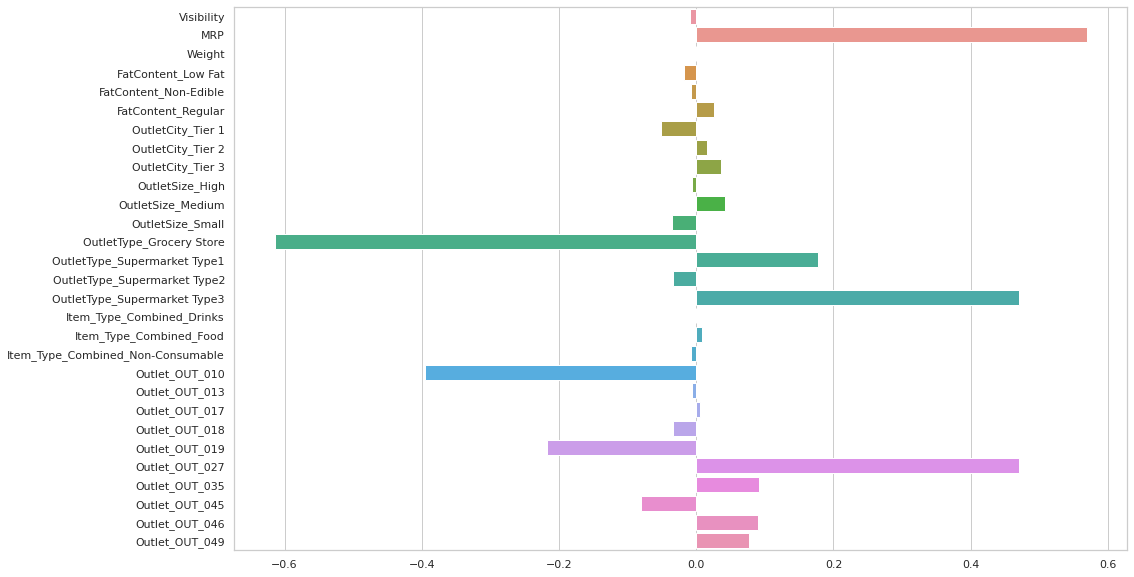

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(model.coef_,features)

## Evaluation

In [ ]:
model.score(X_test,Y_test)

0.5532811378593504

In [ ]:
train_score=model.score(X_train,Y_train)
test_score=model.score(X_test,Y_test)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

Train Score (R-Squared):  0.5665788655876594
Test Score (R-Squared) 0.5532811378593504


In [ ]:
train_predictions = model.predict(X_train)
train_RMSE=mean_squared_error(Y_train,train_predictions)**0.5
test_predictions = model.predict(X_test)
test_RMSE=mean_squared_error(Y_test,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)

Train RMSE :  0.6601541706671149
Test RMSE :  0.6626999787646956
